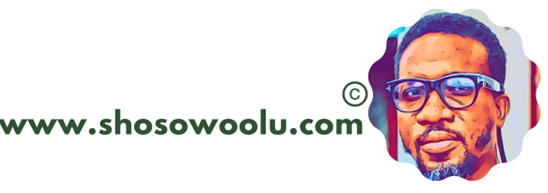

# Pandas Documentation Example Walkthrough Notebook

## Introduction

This notebook is the walkalong from the reading of the Pandas Documentation.

It is used to test/practice all the examples presented in the documentation. 



In [1]:
# Display multiple output in the notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 10 mins to Pandas

In [2]:
import numpy as np
import pandas as pd

**Basic data structures in Pandas**

In [3]:
# Series
# Pandas creates a default `RangeIndex`
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# DataFrame
# Create a DataFrame by passing a NumPy array with a datetime index using `date_range() and labelled columns
dates = pd.date_range('20230101', periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2023-01-01,0.750343,0.338724,0.631899,0.312764
2023-01-02,0.459396,-0.182454,-0.741460,0.802226
2023-01-03,-0.943497,-0.584426,-0.232070,1.328555
2023-01-04,-0.194622,1.019516,0.217083,1.028168
2023-01-05,0.395232,-1.965292,-0.195285,0.294825
2023-01-06,-0.965758,0.115832,1.895121,-0.578287


In [6]:
# Create a DataFrame by passing a dictionary of objects where the keys are the column labels and values are column values
df2 = pd.DataFrame(
        {'A': 1.0,
         'B': pd.Timestamp('20230102'),
         'C': pd.Series(1, index=list(range(4)),dtype='float32'),
         'D': np.array([3] * 4, dtype='int32'),
         'E': pd.Categorical(['test', 'train', 'test', 'train']),
         'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [8]:
# Veiw the top of the data
df2.head()

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [9]:
# Veiw the bottom row of the data
df2.tail(2)

,A,B,C,D,E,F
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [10]:
# Display the index
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Display the columns
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Return the underlining NumPy data
# Pandas will find the NumPy dtype that can hold all the dtypes in the DataFrame.
df2.to_numpy()

array([[1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
# Quick statistics of data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.083151,-0.209683,0.262548,0.531375
std,0.741557,1.014000,0.923696,0.676869
min,-0.965758,-1.965292,-0.741460,-0.578287
25%,-0.756278,-0.483933,-0.222874,0.299309
50%,0.100305,-0.033311,0.010899,0.557495
75%,0.443355,0.283001,0.528195,0.971682
max,0.750343,1.019516,1.895121,1.328555


In [14]:
# Transpose the data
df.T

,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06
A,0.750343,0.459396,-0.943497,-0.194622,0.395232,-0.965758
B,0.338724,-0.182454,-0.584426,1.019516,-1.965292,0.115832
C,0.631899,-0.741460,-0.232070,0.217083,-0.195285,1.895121
D,0.312764,0.802226,1.328555,1.028168,0.294825,-0.578287


In [15]:
# Sort by axis (column - axis)
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2023-01-01,0.312764,0.631899,0.338724,0.750343
2023-01-02,0.802226,-0.741460,-0.182454,0.459396
2023-01-03,1.328555,-0.232070,-0.584426,-0.943497
2023-01-04,1.028168,0.217083,1.019516,-0.194622
2023-01-05,0.294825,-0.195285,-1.965292,0.395232
2023-01-06,-0.578287,1.895121,0.115832,-0.965758


In [16]:
# Sort by Index (row - axis)
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2023-01-06,-0.965758,0.115832,1.895121,-0.578287
2023-01-05,0.395232,-1.965292,-0.195285,0.294825
2023-01-04,-0.194622,1.019516,0.217083,1.028168
2023-01-03,-0.943497,-0.584426,-0.232070,1.328555
2023-01-02,0.459396,-0.182454,-0.741460,0.802226
2023-01-01,0.750343,0.338724,0.631899,0.312764


In [17]:
# Sort values
df.sort_values(by='B', ascending=False)

,A,B,C,D
2023-01-04,-0.194622,1.019516,0.217083,1.028168
2023-01-01,0.750343,0.338724,0.631899,0.312764
2023-01-06,-0.965758,0.115832,1.895121,-0.578287
2023-01-02,0.459396,-0.182454,-0.741460,0.802226
2023-01-03,-0.943497,-0.584426,-0.232070,1.328555
2023-01-05,0.395232,-1.965292,-0.195285,0.294825


**Selection**

The optimised Pandas data access methods are `Dataframe.at()`, `DataFrame.iat()`, `DataFrame.loc`, `DataFrame.iloc`

In [18]:
# For a DataFrame passing a single label selects a column and yields a 'Series'. Same as df.A (no space allowed in column name)
df['A']

2023-01-01    0.750343
2023-01-02    0.459396
2023-01-03   -0.943497
2023-01-04   -0.194622
2023-01-05    0.395232
2023-01-06   -0.965758
Freq: D, Name: A, dtype: float64

In [19]:
df.A

2023-01-01    0.750343
2023-01-02    0.459396
2023-01-03   -0.943497
2023-01-04   -0.194622
2023-01-05    0.395232
2023-01-06   -0.965758
Freq: D, Name: A, dtype: float64

In [20]:
# for a DataFrame, passing a slice `:` selects matching rows
df[0:3]

,A,B,C,D
2023-01-01,0.750343,0.338724,0.631899,0.312764
2023-01-02,0.459396,-0.182454,-0.741460,0.802226
2023-01-03,-0.943497,-0.584426,-0.232070,1.328555


In [21]:
# Selecting by row labels
df['20230102':'20230104']

,A,B,C,D
2023-01-02,0.459396,-0.182454,-0.741460,0.802226
2023-01-03,-0.943497,-0.584426,-0.232070,1.328555
2023-01-04,-0.194622,1.019516,0.217083,1.028168


In [22]:
# Selecting a row matching a label 
df.loc[dates[0]]

A    0.750343
B    0.338724
C    0.631899
D    0.312764
Name: 2023-01-01 00:00:00, dtype: float64

In [23]:
# Select all rows with a select column labels
df.loc[ :,['A', 'C']]

,A,C
2023-01-01,0.750343,0.631899
2023-01-02,0.459396,-0.741460
2023-01-03,-0.943497,-0.232070
2023-01-04,-0.194622,0.217083
2023-01-05,0.395232,-0.195285
2023-01-06,-0.965758,1.895121


In [24]:
# For label slicing, both endpoint are included.
df.loc['20230101':'20230104', ['A','B', "C"]]

,A,B,C
2023-01-01,0.750343,0.338724,0.631899
2023-01-02,0.459396,-0.182454,-0.741460
2023-01-03,-0.943497,-0.584426,-0.232070
2023-01-04,-0.194622,1.019516,0.217083


In [25]:
# Selecting a single row and column returns a scalar
df.loc[dates[0], "A"]

0.750343478070365

In [26]:
# For getting faster access to scalar like above
df.at[dates[0], 'A']

0.750343478070365

In [27]:
# Selection by position 
df.iloc[3] #4th row


A   -0.194622
B    1.019516
C    0.217083
D    1.028168
Name: 2023-01-04 00:00:00, dtype: float64

In [28]:
# Interger slices similar to NumPy/Python
df.iloc[3:5, 0:3]

,A,B,C
2023-01-04,-0.194622,1.019516,0.217083
2023-01-05,0.395232,-1.965292,-0.195285


In [29]:
# Lists of integer position locations
df.iloc[[1,2,4], [0,2]]

,A,C
2023-01-02,0.459396,-0.741460
2023-01-03,-0.943497,-0.232070
2023-01-05,0.395232,-0.195285


In [30]:
# Column slicing explicitly
df.iloc[:, 1:3]

,B,C
2023-01-01,0.338724,0.631899
2023-01-02,-0.182454,-0.741460
2023-01-03,-0.584426,-0.232070
2023-01-04,1.019516,0.217083
2023-01-05,-1.965292,-0.195285
2023-01-06,0.115832,1.895121


In [31]:
# Getting a value explicitly
df.iloc[1, 1]

-0.1824543336895513

In [32]:
# Get a fast access to a value explicitly (similar outcome to above)
df.iat[1, 1]

-0.1824543336895513

**Boolean Indexing**

In [33]:
# Select rows where df.A is greater than 0
df[df['A'] > 0]

,A,B,C,D
2023-01-01,0.750343,0.338724,0.631899,0.312764
2023-01-02,0.459396,-0.182454,-0.741460,0.802226
2023-01-05,0.395232,-1.965292,-0.195285,0.294825


In [34]:
# Select values from DataFrame where a boolean condition is met
df[df > 0]

,A,B,C,D
2023-01-01,0.750343,0.338724,0.631899,0.312764
2023-01-02,0.459396,NaN,NaN,0.802226
2023-01-03,NaN,NaN,NaN,1.328555
2023-01-04,NaN,1.019516,0.217083,1.028168
2023-01-05,0.395232,NaN,NaN,0.294825
2023-01-06,NaN,0.115832,1.895121,NaN


In [35]:
# Using `isin` method for filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2023-01-01,0.750343,0.338724,0.631899,0.312764,one
2023-01-02,0.459396,-0.182454,-0.741460,0.802226,one
2023-01-03,-0.943497,-0.584426,-0.232070,1.328555,two
2023-01-04,-0.194622,1.019516,0.217083,1.028168,three
2023-01-05,0.395232,-1.965292,-0.195285,0.294825,four
2023-01-06,-0.965758,0.115832,1.895121,-0.578287,three


In [36]:
# The boolean filter
df2['E'].isin(['two', 'four'])

2023-01-01    False
2023-01-02    False
2023-01-03     True
2023-01-04    False
2023-01-05     True
2023-01-06    False
Freq: D, Name: E, dtype: bool

In [37]:
# Applying the boolean filter
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2023-01-03,-0.943497,-0.584426,-0.232070,1.328555,two
2023-01-05,0.395232,-1.965292,-0.195285,0.294825,four


**Setting**

In [38]:
# Setting a new column automatically aligns the data by indexes
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20230102', periods=6))
s1

2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
Freq: D, dtype: int64

In [39]:
df['F'] = s1

In [40]:
# Setting values by label
df.at[dates[0], 'A'] = 0

In [41]:
# Setting values by position
df.iat[0,1] = 0

In [42]:
# Setting value by assigning with a NumPy array
df.loc[:, 'D'] = np.array([5] * len(df))

C:\Users\admin\AppData\Local\Temp\ipykernel_16064\2448912630.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


In [43]:
df

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.631899,5,NaN
2023-01-02,0.459396,-0.182454,-0.741460,5,1.0
2023-01-03,-0.943497,-0.584426,-0.232070,5,2.0
2023-01-04,-0.194622,1.019516,0.217083,5,3.0
2023-01-05,0.395232,-1.965292,-0.195285,5,4.0
2023-01-06,-0.965758,0.115832,1.895121,5,5.0


In [44]:
# A `where` operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2 #boolean where type filter to set value
df2

,A,B,C,D,F
2023-01-01,0.000000,0.000000,-0.631899,-5,NaN
2023-01-02,-0.459396,-0.182454,-0.741460,-5,-1.0
2023-01-03,-0.943497,-0.584426,-0.232070,-5,-2.0
2023-01-04,-0.194622,-1.019516,-0.217083,-5,-3.0
2023-01-05,-0.395232,-1.965292,-0.195285,-5,-4.0
2023-01-06,-0.965758,-0.115832,-1.895121,-5,-5.0


**Missing Data**

`np.nan` represents missing data in NumPy data type and by default not included in computations

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) +['E'])

In [46]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.631899,5,NaN,1.0
2023-01-02,0.459396,-0.182454,-0.741460,5,1.0,1.0
2023-01-03,-0.943497,-0.584426,-0.232070,5,2.0,NaN
2023-01-04,-0.194622,1.019516,0.217083,5,3.0,NaN


In [47]:
# `DataFrame.dropna()` drops any rows that have missing data
df1.dropna(how='any') # not inplace

,A,B,C,D,F,E
2023-01-02,0.459396,-0.182454,-0.74146,5,1.0,1.0


In [48]:
df1 # the original DataFrame is unchanged

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.631899,5,NaN,1.0
2023-01-02,0.459396,-0.182454,-0.741460,5,1.0,1.0
2023-01-03,-0.943497,-0.584426,-0.232070,5,2.0,NaN
2023-01-04,-0.194622,1.019516,0.217083,5,3.0,NaN


In [49]:
# `DataFrame.fillna()` fills missing data
df1.fillna(value=5) # not inplace 

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.631899,5,5.0,1.0
2023-01-02,0.459396,-0.182454,-0.741460,5,1.0,1.0
2023-01-03,-0.943497,-0.584426,-0.232070,5,2.0,5.0
2023-01-04,-0.194622,1.019516,0.217083,5,3.0,5.0


In [50]:
df1 # original df remains unchanged

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.631899,5,NaN,1.0
2023-01-02,0.459396,-0.182454,-0.741460,5,1.0,1.0
2023-01-03,-0.943497,-0.584426,-0.232070,5,2.0,NaN
2023-01-04,-0.194622,1.019516,0.217083,5,3.0,NaN


In [51]:
# `isna()` gets the boolean mask where values are `nan`
pd.isna(df1)

,A,B,C,D,F,E
2023-01-01,False,False,False,False,True,False
2023-01-02,False,False,False,False,False,False
2023-01-03,False,False,False,False,False,True
2023-01-04,False,False,False,False,False,True


In [52]:
# Carry out the inplace operations
df3 = df1.copy()
df4 = df1.copy()
df3.dropna(how='any', inplace=True)
df4.fillna(value=5, inplace=True)

In [53]:
df3

,A,B,C,D,F,E
2023-01-02,0.459396,-0.182454,-0.74146,5,1.0,1.0


In [54]:
df4

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.631899,5,5.0,1.0
2023-01-02,0.459396,-0.182454,-0.741460,5,1.0,1.0
2023-01-03,-0.943497,-0.584426,-0.232070,5,2.0,5.0
2023-01-04,-0.194622,1.019516,0.217083,5,3.0,5.0


**Operations**

Operations in general ***exclude*** missing data

In [55]:
# Calculate mean for each column
df.mean() #axis=0 is default

A   -0.208208
B   -0.266137
C    0.262548
D    5.000000
F    3.000000
dtype: float64

In [56]:
# Calculate the mean for each row
df.mean(axis=1)

2023-01-01    1.407975
2023-01-02    1.107096
2023-01-03    1.048001
2023-01-04    1.808395
2023-01-05    1.446931
2023-01-06    2.209039
Freq: D, dtype: float64

Operating with another `Series` or `DataFrame` with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with `np.nan`

In [57]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2023-01-01    NaN
2023-01-02    NaN
2023-01-03    1.0
2023-01-04    3.0
2023-01-05    5.0
2023-01-06    NaN
Freq: D, dtype: float64

In [58]:
df

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.631899,5,NaN
2023-01-02,0.459396,-0.182454,-0.741460,5,1.0
2023-01-03,-0.943497,-0.584426,-0.232070,5,2.0
2023-01-04,-0.194622,1.019516,0.217083,5,3.0
2023-01-05,0.395232,-1.965292,-0.195285,5,4.0
2023-01-06,-0.965758,0.115832,1.895121,5,5.0


In [59]:
df.sub(s, axis='index')


,A,B,C,D,F
2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN,NaN
2023-01-03,-1.943497,-1.584426,-1.232070,4.0,1.0
2023-01-04,-3.194622,-1.980484,-2.782917,2.0,0.0
2023-01-05,-4.604768,-6.965292,-5.195285,0.0,-1.0
2023-01-06,NaN,NaN,NaN,NaN,NaN


In [60]:
# User defined functions
# `DataFrame.agg()` and `DataFrame.Transform()` applies a user defined function that reduces or broadcast its results respectively.
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.165966
B    -1.490369
C     1.470268
D    28.000000
F    16.800000
dtype: float64

In [61]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2023-01-01,0.000000,0.000000,63.948169,506.0,NaN
2023-01-02,46.490856,-18.464379,-75.035799,506.0,101.2
2023-01-03,-95.481880,-59.143907,-23.485520,506.0,202.4
2023-01-04,-19.695732,103.175057,21.968783,506.0,303.6
2023-01-05,39.997449,-198.887532,-19.762827,506.0,404.8
2023-01-06,-97.734728,11.722224,191.786212,506.0,506.0


**Value Counts**

In [62]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    6
2    4
3    5
4    0
5    5
6    2
7    5
8    0
9    5
dtype: int32

In [63]:
s.value_counts()

5    4
2    2
0    2
6    1
4    1
dtype: int64

**String Operations**

`Series` is equipped with set of string processing methods in the `str` attribute.

In [64]:
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2    Aaba
3    Baca
4     NaN
5    CABA
6     dog
7     cat
dtype: object

In [65]:
s.str.lower() # operation is not inplace automatically

0       a
1       b
2    aaba
3    baca
4     NaN
5    caba
6     dog
7     cat
dtype: object

In [66]:
s

0       A
1       B
2    Aaba
3    Baca
4     NaN
5    CABA
6     dog
7     cat
dtype: object

**Merge**

In [67]:
# Uses the set logic for the indexes and relational algebra dunctinality in the case of join/merge-type operations
# Concat() - Concatenating pandas objects together row-wise with concat()
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.743688,0.558175,0.122065,-1.802442
1,-1.438934,-1.210776,0.900295,0.295283
2,-0.671326,1.696914,0.531555,1.281950
3,0.787885,-0.696643,-0.702837,0.238605
4,-0.087942,0.315547,0.186702,0.315033
5,-1.243479,1.061962,-0.982576,-0.095521
6,-1.792644,-0.387219,-0.143545,-0.482790
7,1.542768,-0.470323,0.480014,0.109230
8,0.957533,-1.147238,-0.498546,0.657213
9,1.131816,0.868619,0.217063,0.353791


In [68]:
# Break the df into piece
pieces= [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.743688  0.558175  0.122065 -1.802442
 1 -1.438934 -1.210776  0.900295  0.295283
 2 -0.671326  1.696914  0.531555  1.281950,
           0         1         2         3
 3  0.787885 -0.696643 -0.702837  0.238605
 4 -0.087942  0.315547  0.186702  0.315033
 5 -1.243479  1.061962 -0.982576 -0.095521
 6 -1.792644 -0.387219 -0.143545 -0.482790,
           0         1         2         3
 7  1.542768 -0.470323  0.480014  0.109230
 8  0.957533 -1.147238 -0.498546  0.657213
 9  1.131816  0.868619  0.217063  0.353791]

In [69]:
pd.concat(pieces)

,0,1,2,3
0,0.743688,0.558175,0.122065,-1.802442
1,-1.438934,-1.210776,0.900295,0.295283
2,-0.671326,1.696914,0.531555,1.281950
3,0.787885,-0.696643,-0.702837,0.238605
4,-0.087942,0.315547,0.186702,0.315033
5,-1.243479,1.061962,-0.982576,-0.095521
6,-1.792644,-0.387219,-0.143545,-0.482790
7,1.542768,-0.470323,0.480014,0.109230
8,0.957533,-1.147238,-0.498546,0.657213
9,1.131816,0.868619,0.217063,0.353791


Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. It is recommended to pass a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appendding records to it.

**Join**

In [70]:
# merge() enables SQL style join types along specific columns
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [71]:
left

,key,lval
0,foo,1
1,foo,2


In [72]:
right

,key,rval
0,foo,4
1,foo,5


In [73]:
pd.merge(left, right, on='key') # keys are not unique

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [74]:
# merge on unique keys
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [75]:
left

,key,lval
0,foo,1
1,bar,2


In [76]:
right

,key,rval
0,foo,4
1,bar,5


In [77]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


**Grouping**

`groupby` involves one or more of the following process:
    
   * **Splitting** the data into group based on some criteria
   * **Applying** a functions to each group independently
   * **Combining** the results into a data structure

In [78]:
df = pd.DataFrame(
    {
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar','foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    }
)
    
df

,A,B,C,D
0,foo,one,1.217121,0.358042
1,bar,one,0.251024,1.928816
2,foo,two,-0.139654,0.182867
3,bar,three,0.750726,0.199569
4,foo,two,0.575418,1.595974
5,bar,two,-0.320667,-2.037108
6,foo,one,2.723836,0.702964
7,foo,three,0.588834,0.546697


In [79]:
# Group by column label, selecting column labels and applying the sum() function to the resulting groups
df.groupby('A')[['C', 'D']].sum()

,C,D
A,,
bar,0.681083,0.091277
foo,4.965555,3.386545


In [80]:
# Grouping by multiple columns label forms MultiIndex
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.251024  1.928816
    three  0.750726  0.199569
    two   -0.320667 -2.037108
foo one    3.940958  1.061007
    three  0.588834  0.546697
    two    0.435763  1.778841

**Reshaping**

**Stack**

In [81]:
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],
]

In [82]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [83]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [84]:
df

A         B
first second                    
bar   one    -0.913983  0.442266
      two     0.401807  1.146772
baz   one     0.568439 -0.626621
      two     1.493240  1.317984
foo   one    -0.302801 -1.940766
      two     1.028052  0.391870
qux   one    -0.514299 -0.879167
      two    -1.004063  1.788300

In [85]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.913983  0.442266
      two     0.401807  1.146772
baz   one     0.568439 -0.626621
      two     1.493240  1.317984

In [86]:
# `stack()` method "compresses" a level in the DataFrame's column
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.913983
               B    0.442266
       two     A    0.401807
               B    1.146772
baz    one     A    0.568439
               B   -0.626621
       two     A    1.493240
               B    1.317984
dtype: float64

In [87]:
# With a "stacked" DataFrame or Series having a `MultiIndex` as the index, the inverse operations of `stack()` is `unstack()` - which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.913983  0.442266
      two     0.401807  1.146772
baz   one     0.568439 -0.626621
      two     1.493240  1.317984

In [88]:
# unstack the second level
stacked.unstack(1)

second        one       two
first                      
bar   A -0.913983  0.401807
      B  0.442266  1.146772
baz   A  0.568439  1.493240
      B -0.626621  1.317984

In [89]:
# Unstack the first level
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.913983  0.568439
       B  0.442266 -0.626621
two    A  0.401807  1.493240
       B  1.146772  1.317984

**Pivot Table**

In [90]:
df = pd.DataFrame(
{
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A', 'B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randn(12),
    'E': np.random.randn(12)
})

df

,A,B,C,D,E
0,one,A,foo,1.019617,0.214691
1,one,B,foo,0.766432,1.143320
2,two,C,foo,-1.902407,1.253774
3,three,A,bar,-0.597506,-0.313731
4,one,B,bar,-1.091914,-0.265901
5,one,C,bar,-0.175044,-1.136584
6,two,A,foo,1.130755,2.261625
7,three,B,foo,0.236639,-1.423876
8,one,C,foo,0.484658,-1.333247
9,one,A,bar,0.781462,0.010917


In [91]:
# `pivot_table()` pivots a DataFrame specifying the `values`, `index` and `columns`
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.781462  1.019617
      B -1.091914  0.766432
      C -0.175044  0.484658
three A -0.597506       NaN
      B       NaN  0.236639
      C  0.646965       NaN
two   A       NaN  1.130755
      B -0.167396       NaN
      C       NaN -1.902407

**Time Series**

Pandas has simple, powerful and efficient functionality for performing resampling operations during frequency conversion (e.g converting secondly data into 5-minutely data. This is extremely common in, but not limited to, financial applications.)

In [92]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [93]:
ts

2012-01-01 00:00:00    225
2012-01-01 00:00:01    181
2012-01-01 00:00:02    211
2012-01-01 00:00:03    205
2012-01-01 00:00:04    363
                      ... 
2012-01-01 00:01:35    343
2012-01-01 00:01:36    368
2012-01-01 00:01:37    179
2012-01-01 00:01:38    329
2012-01-01 00:01:39     11
Freq: S, Length: 100, dtype: int32

In [94]:
ts.resample('5Min').sum()

2012-01-01    23456
Freq: 5T, dtype: int32

In [95]:
# `Series.tz_localize()` localizes a time series to a time zone:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -1.227321
2012-03-07    0.688071
2012-03-08   -0.795739
2012-03-09   -0.728165
2012-03-10   -0.863201
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')

In [97]:
ts_utc

2012-03-06 00:00:00+00:00   -1.227321
2012-03-07 00:00:00+00:00    0.688071
2012-03-08 00:00:00+00:00   -0.795739
2012-03-09 00:00:00+00:00   -0.728165
2012-03-10 00:00:00+00:00   -0.863201
Freq: D, dtype: float64

`Series.tz_convert()` converts a timezones aware time series to another time zone:

In [98]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.227321
2012-03-06 19:00:00-05:00    0.688071
2012-03-07 19:00:00-05:00   -0.795739
2012-03-08 19:00:00-05:00   -0.728165
2012-03-09 19:00:00-05:00   -0.863201
Freq: D, dtype: float64

In [99]:
# Adding a non-fixed duration `BusinessDay` to a time series:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [100]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

**Categorical**

In [101]:
# Pandas can include categorical data in a DatFrame
df = pd.DataFrame(
    {
        'id': [1, 2, 3, 4, 5, 6], 
        'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']
    })

In [102]:
# Converting the raw grades to a categorical data type
df['grade'] = df['raw_grade'].astype('category')

In [103]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [104]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [105]:
# Rename the categories to a more meaningful names:
new_categories = ['very good', 'good', 'very bad']

df['grade'] = df['grade'].cat.rename_categories(new_categories)

In [106]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [107]:
# Reorder the categories and simultaneously add the missing categories
# Methods under `Series.cat()` return a new `Series` by default

df['grade'] = df['grade'].cat.set_categories(
                            ['very bad', 'bad', 'medium', 'good', 'very good']
                            )

In [108]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [109]:
# Sorting is per order in the categories, not lexical order
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [110]:
# Grouping by a categorical column with `observed=False` also shows empty categories

In [111]:
df.groupby('grade', observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

**Ploting**

In [112]:
# We use the standard convention for referencing the matplotlib API
import matplotlib.pyplot as plt

plt.close('all') # Yhe `plt.close` method is used to close a figure window


In [113]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.770438
2000-01-02    0.050784
2000-01-03   -0.421854
2000-01-04   -0.320090
2000-01-05    0.368707
                ...   
2002-09-22    0.636616
2002-09-23   -1.871597
2002-09-24    0.621975
2002-09-25    0.977550
2002-09-26    0.696815
Freq: D, Length: 1000, dtype: float64

<Axes: >

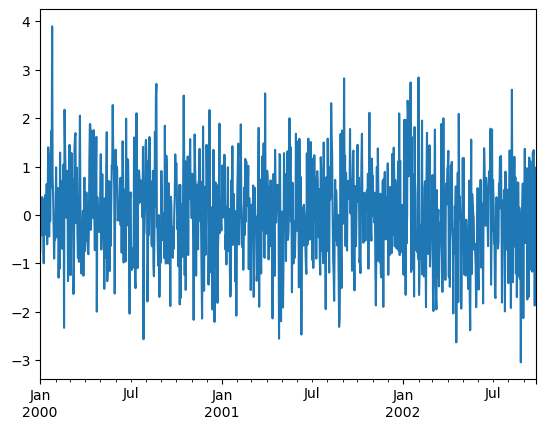

In [114]:
ts.plot()

In [115]:
ts = ts.cumsum()

<Axes: >

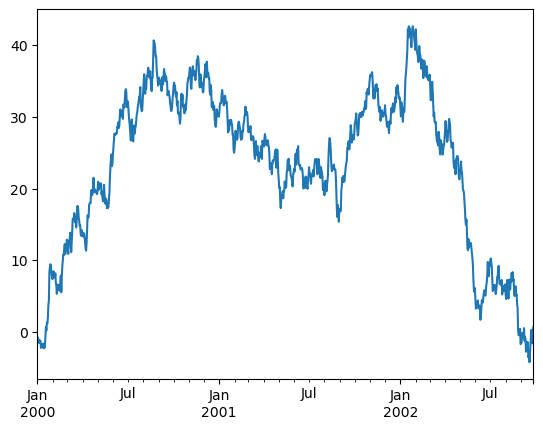

In [116]:
ts.plot()

When using Jupyter, the plot will appear using `plot()`. Otherwise use `matplotlib.pyplot.show` to show it or `matplotlib.pyplot.savefig` to write it to a file.

`plot()` plots all columns

In [117]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.799807,1.014482,1.494480,0.229602
2000-01-02,0.909731,0.813519,1.231713,0.047902
2000-01-03,0.554449,-0.940165,-0.931082,0.935105
2000-01-04,-0.348041,0.270239,0.347027,-0.291045
2000-01-05,-0.694666,1.162402,0.414873,-1.007503
...,...,...,...,...
2002-09-22,-0.567766,2.678185,1.287763,-1.030316
2002-09-23,-0.713092,-1.271348,-0.074766,0.024969
2002-09-24,1.313817,-1.216466,0.587658,-0.376493
2002-09-25,1.671381,-0.893950,0.908689,-0.365323


In [118]:
df = df.cumsum()

In [119]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

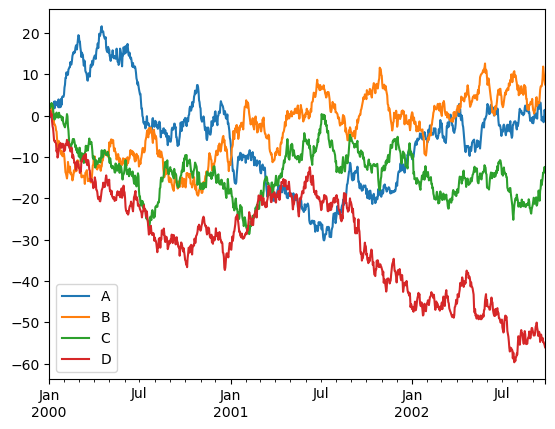

In [120]:
df.plot()
plt.legend(loc='best');

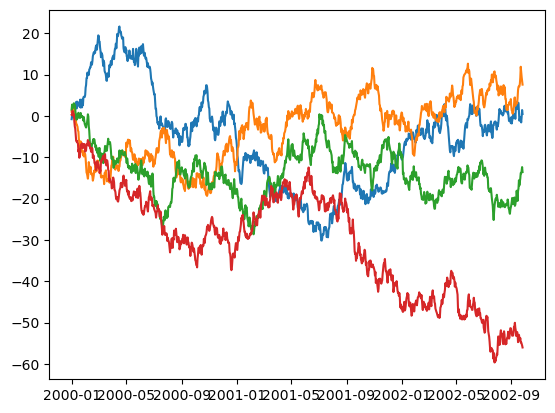

In [121]:
# Plot using matplotib directly to compare
plt.plot(df);

**Importing and Exporting Data**

**CSV**

In [122]:
# Writing to a CSV file using `DataFrame.to_csv()`
df = pd.DataFrame(np.random.randint(0, 5, size=(10, 5)), columns =['A', 'B', 'C', 'D', 'E'])

In [123]:
# Write to csv file
df.to_csv('data/foo.csv', index=False)

In [124]:
# Read from a csv file using `DataFrame.read_csv()
df2 = pd.read_csv('data/foo.csv')
df2

,A,B,C,D,E
0,0,3,3,1,1
1,3,2,0,3,2
2,1,1,4,1,3
3,0,2,0,3,2
4,0,0,0,1,0
5,3,4,1,3,0
6,0,1,4,1,1
7,4,4,3,0,0
8,4,2,4,1,4
9,0,2,4,2,4


**Parquet**

In [125]:
# Writing to a Parquet file using `DataFrame.to_parquet()`
df.to_parquet('data/foo.parquet')

In [126]:
# Read from Parquet file using `DataFrame.read_parquet`
df3 = pd.read_parquet('data/foo.parquet')
df3

,A,B,C,D,E
0,0,3,3,1,1
1,3,2,0,3,2
2,1,1,4,1,3
3,0,2,0,3,2
4,0,0,0,1,0
5,3,4,1,3,0
6,0,1,4,1,1
7,4,4,3,0,0
8,4,2,4,1,4
9,0,2,4,2,4


**Excel**

In [127]:
# Write to excel using 'DataFrame.to_excel()'
df.to_excel('data/foo.xlsx', sheet_name='Sheet1', index=False)

In [128]:
# Read an excel file to DataFrame
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D,E
0,0,3,3,1,1
1,3,2,0,3,2
2,1,1,4,1,3
3,0,2,0,3,2
4,0,0,0,1,0
5,3,4,1,3,0
6,0,1,4,1,1
7,4,4,3,0,0
8,4,2,4,1,4
9,0,2,4,2,4


### Intro to Data Structures

In [129]:
#%ismagic

Fundamentally , **data alignment is intrinsic.** The link between labels and data will not be broken unless done so explicitly.

In [130]:
import numpy as np
import pandas as pd

**Series**

Capable of holding any data type (integers, strings, floating point numbers, Python objects etc) The axis labels collectively referred to as the **index**

Method to create is to call:
`pd.Series(data, index=index)`

`data` can be many different things: 

* a Python dict
* an ndarray
* a scalar value (e.g 5)

***From ndarray***

In [131]:
# if `data` is an ndarray, index must be the same length as the data. If no index is passed, one is created having the values [0,..., len(data) -1]

s = pd.Series(np.random.randn(5), index = ['a', 'b', 'c', 'd', 'e'])
s

a    1.383806
b    0.856949
c   -0.717045
d   -0.272998
e   -0.998188
dtype: float64

In [132]:
# Check the index  object
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [133]:
# Create without index
s = pd.Series(np.random.randn(5))
s

0   -0.734594
1   -0.997454
2   -0.128939
3   -2.480969
4   -1.356157
dtype: float64

>Pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.

***From dict***

In [134]:
# From dict
d = {'b': 1, 'd': 0, 'a': 7}

pd.Series(d)


b    1
d    0
a    7
dtype: int64

In [135]:
# if an index is passed, the value in data corresponding to the labels in the index will be pulled out
d = {'b': 1, 'd': 0, 'a': 7}

pd.Series(d, index =['b', 'a'])

b    1
a    7
dtype: int64

In [136]:
# when item in the index list is not in dict, the index is added with NaN value
pd.Series(d, index =['b', 'a', 'e', 'f'])

b    1.0
a    7.0
e    NaN
f    NaN
dtype: float64

***From scalar value***

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**


In [137]:
pd.Series(5.0, index=['a', 'b', 'c', 'e'])

a    5.0
b    5.0
c    5.0
e    5.0
dtype: float64

**Series is ndarray-like**

`Series` acts very similar to a `ndarray` and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [138]:
s

0   -0.734594
1   -0.997454
2   -0.128939
3   -2.480969
4   -1.356157
dtype: float64

In [139]:
s.iloc[0]

-0.7345940653103794

In [140]:
s.iloc[:3]

0   -0.734594
1   -0.997454
2   -0.128939
dtype: float64

In [141]:
s[s > s.median()]

0   -0.734594
2   -0.128939
dtype: float64

In [142]:
s.iloc[[4, 3, 1]] # array-based indexing

4   -1.356157
3   -2.480969
1   -0.997454
dtype: float64

In [143]:
np.exp(s)

0    0.479700
1    0.368817
2    0.879028
3    0.083662
4    0.257649
dtype: float64

Like the NumPy array, a pandas `Series` has a single `dtype`. 

while `Sereis` is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()


In [144]:
s.to_numpy

<bound method IndexOpsMixin.to_numpy of 0   -0.734594
1   -0.997454
2   -0.128939
3   -2.480969
4   -1.356157
dtype: float64>

**Series is dict-like**

A `Series` is also like a fixed-size dict in that you can get and set values by index label

In [145]:
s[2]

-0.1289388210146496

In [146]:
# set the value using label(index)
s[2] = 4

In [147]:
s[2]

4.0

In [148]:
s

0   -0.734594
1   -0.997454
2    4.000000
3   -2.480969
4   -1.356157
dtype: float64

In [149]:
2 in s

True

In [150]:
7 in s

# if a label is not contained in the index, an exception is raised

False

In [151]:
s[7]

KeyError: 7

In [152]:
# Using the `Series.get() method, a missing label will return None or specified default:

s.get(7)

In [153]:
s.get(7, np.nan)

# These labels can also be accessed by `attribute`

nan

**Vectorized Operations and Label Alignment with Series**

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with `Series` in pandas. `Series` can also be passed into most NumPy methods expecting an ndarray.

In [154]:
s

0   -0.734594
1   -0.997454
2    4.000000
3   -2.480969
4   -1.356157
dtype: float64

In [155]:
s + s

0   -1.469188
1   -1.994908
2    8.000000
3   -4.961937
4   -2.712314
dtype: float64

In [156]:
s * 2

0   -1.469188
1   -1.994908
2    8.000000
3   -4.961937
4   -2.712314
dtype: float64

A key difference between `Series` and ndarray is that operations between `Series` automatically align the data based on label.
Thus, you can write computations without giving consideration to whether the `Series` involved have the same labels.

In [157]:
s.iloc[1:] + s.iloc[:-1]

0         NaN
1   -1.994908
2    8.000000
3   -4.961937
4         NaN
dtype: float64

In [164]:
s.iloc[:-1]

0   -0.734594
1   -0.997454
2    4.000000
3   -2.480969
dtype: float64

The result of an operation between unaligned `Series` will have the **union** of the indexes involved. If the label is not found in one `Series` or the other, the result will be marked as missing `NaN`

In general, we chose to make the default result of operations between differently indexed objects yield the union of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the dropna function.

**Name attribute**

In [165]:
# Series also has a `name` attribute
s = pd.Series(np.random.randn(5), name='something')

In [166]:
s

0   -3.299774
1    0.751663
2   -2.248660
3    1.202328
4   -0.533502
Name: something, dtype: float64

In [167]:
s.name

'something'

The `Series` `name` can be assigned automatically in many cases, in particular when selecting a single column from a DataFrame, the `name` will be assigned the column label.

You can rename a `Series` with the pandas.Series.rename() method.

In [168]:
s2 = s.rename('different')

In [169]:
s2.name

# s and s2 refer to different objects.

'different'

**DataFrame**

Like `Series`, DataFrame accepts many different kinds of input:
    
   * Dict of 1D ndarrays, lists, dict, or `Series`
   * 2-D numpy.ndarray
   * Structured or record ndarray
   * A `Series`
   * Another `DataFrame`
   
Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

**From dict of ndarrays/ lists**

In [171]:
# The ndarrays must all be the same lenght. If index is passed, it must also be the same length as the arrays.
# If no index is passed, the result will be `range(n)` where n is the array length
d = {'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [172]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


**From structured or record array**

In [173]:
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])

In [175]:
data[:] = [(1, 2.0, 'Hello'), (2, 3.0, 'World')]

In [176]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, index=[])